In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = 16,8

labels = pd.Series({
    1: True,
    2: False,
    3: True,
    4: False,
    5: False,
    6: True,
    7: False,
    8: True,
    9: True,
    10: False,
    11: True,
    12: False,
    13: False,
    14: True,
    15: True,
    16: False
})

idx = list(range(1,17))

In [56]:
df = pd.read_csv('/Users/manuelgiambi/Downloads/Thesis - Form Responses - Form responses 1.csv')

df = df.iloc[:, [0]+[4,5,6,7,8]+list(range(14,len(df.columns)-12))]
df = df.replace(to_replace=['Strongly Agree', 'Agree', 'Undecided', 'Disagree', 'Strongly Disagree'], value=[5,4,3,2,1])
df = df.replace(to_replace=['Human', 'Computer'], value=[True, False])
df = df.replace(to_replace=[
    'I am a music lover and sometimes listen to jazz music',
    'I am not very familiar with jazz music',
    'I am a musician and/or a jazz enthusiast'
], value=['low', 'middle', 'high'])


rename_cols = {
    'Timestamp': 'timestamp',
    'What is your nationality?.1': 'nationality',
    'What is your age?.1': 'age',
    'What is your relationship with jazz music?.1': 'acquaintance',
    'Does the music in the clip above sound good overall?': 'q1',
    'Does the music in the clip above sound novel and interesting?': 'n1',
    'Do you think that the music in the clip above music has been improvised by a human or a computer?': 'h1'
}

for i in range(1, 16):
    rename_cols[f'Does the music in the clip above sound good overall?.{i}'] =  f'q{i+1}'
    rename_cols[f'Does the music in the clip above sound novel and interesting?.{i}'] = f'n{i+1}'
    rename_cols[f'Do you think that the music in the clip above music has been improvised by a human or a computer?.{i}'] = f'h{i+1}'

df = df.rename(columns=rename_cols)

In [57]:
df

,timestamp,nationality,age,acquaintance,q1,n1,h1,q2,n2,h2,...,h13,q14,n14,h14,q15,n15,h15,q16,n16,h16
0,26/06/2022 15:58:52,Philippines,15 - 30 years old,low,5,5,True,4,4,False,...,False,5.0,5.0,True,1.0,1.0,False,2.0,3.0,False
1,26/06/2022 16:02:47,Taiwan,15 - 30 years old,middle,4,5,False,4,4,False,...,True,5.0,5.0,True,5.0,4.0,False,4.0,5.0,False
2,26/06/2022 16:16:45,Italy,15 - 30 years old,middle,3,3,False,4,2,False,...,False,3.0,4.0,False,4.0,3.0,False,4.0,4.0,True
3,26/06/2022 16:17:45,Italy,15 - 30 years old,middle,3,4,False,4,2,True,...,False,5.0,5.0,True,4.0,3.0,False,2.0,3.0,False
4,26/06/2022 16:17:47,Italy,15 - 30 years old,low,4,2,False,5,3,True,...,False,5.0,5.0,True,3.0,3.0,False,4.0,3.0,False
5,26/06/2022 16:27:27,Italy,15 - 30 years old,low,2,1,False,3,2,True,...,True,4.0,4.0,True,2.0,2.0,False,2.0,2.0,False
6,26/06/2022 16:36:15,Taiwan,15 - 30 years old,low,3,2,False,4,4,True,...,False,4.0,4.0,False,3.0,2.0,False,4.0,2.0,True
7,26/06/2022 16:45:34,Italy,15 - 30 years old,middle,2,2,False,5,5,True,...,False,4.0,4.0,True,4.0,4.0,True,1.0,2.0,False
8,26/06/2022 16:49:37,Italy,30 - 45 years old,low,4,2,False,4,4,True,...,False,3.0,3.0,False,4.0,3.0,False,5.0,5.0,True
9,26/06/2022 17:32:45,Taiwan,15 - 30 years old,middle,4,4,True,4,4,True,...,True,4.0,2.0,False,5.0,2.0,True,4.0,2.0,False


/var/folders/g7/q5nvdv9d5m91922xg4g9mn380000gn/T/ipykernel_7948/550813230.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  qscores = df.filter(regex=("q[0-9]*")).mean(axis=0)


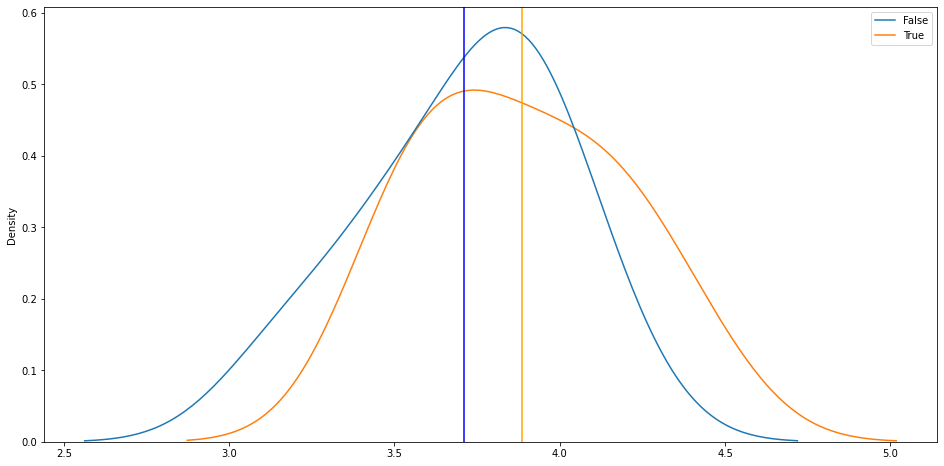

In [158]:
qscores = df.filter(regex=("q[0-9]*")).mean(axis=0)
qscores.index = idx
sns.kdeplot(x=qscores, hue=labels)
plt.axvline(x=qscores[labels].mean(), color='orange')
plt.axvline(x=qscores[~labels].mean(), color='blue')

/var/folders/g7/q5nvdv9d5m91922xg4g9mn380000gn/T/ipykernel_7948/1735532434.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nscores = df.filter(regex=("n[0-9]*")).mean(axis=0)


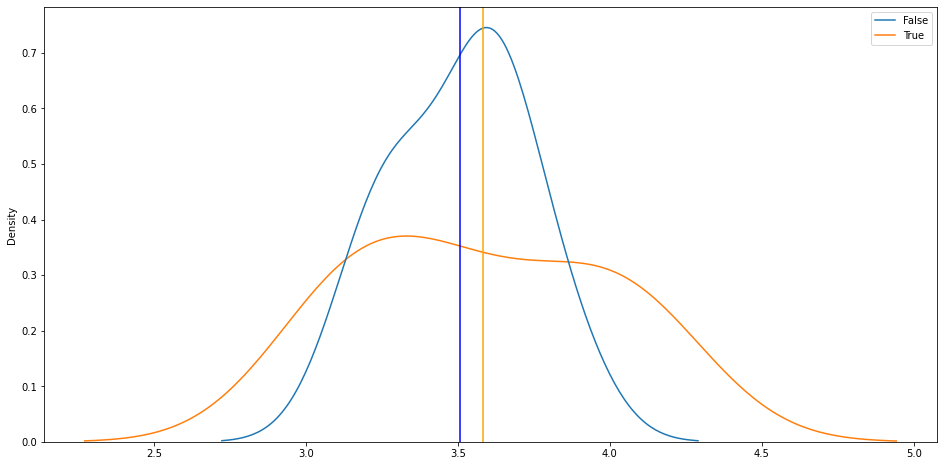

In [159]:
nscores = df.filter(regex=("n[0-9]*")).mean(axis=0)
nscores.index = idx
sns.kdeplot(x=nscores, hue=labels)
plt.axvline(x=nscores[labels].mean(), color='orange')
plt.axvline(x=nscores[~labels].mean(), color='blue')

/Users/manuelgiambi/PycharmProjects/thesis/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


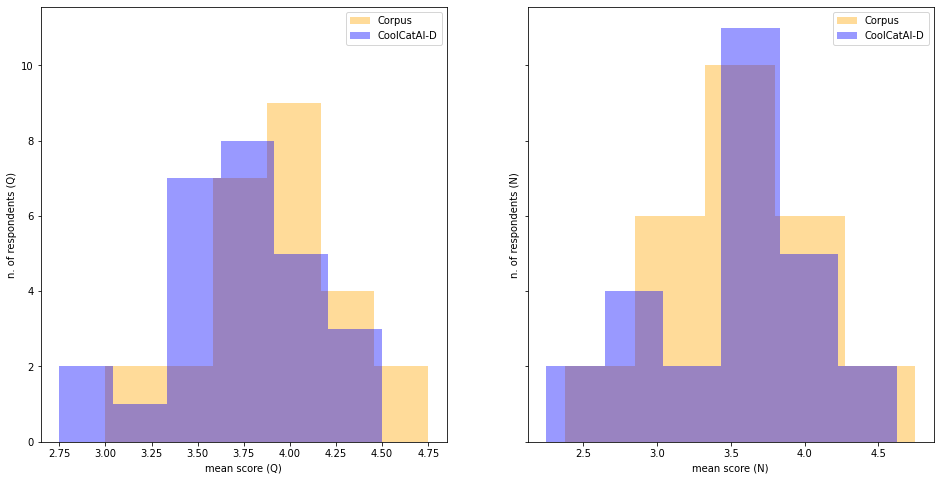

In [393]:
q_voting = df.filter(regex=("q[0-9]+"))
tot_q_voting = q_voting.mean(axis=1)
h_q_voting = q_voting.iloc[:, labels.values].mean(axis=1)
c_q_voting = q_voting.iloc[:, ~labels.values].mean(axis=1)

n_voting = df.filter(regex=("n[0-9]+"))
tot_n_voting = n_voting.mean(axis=1)
h_n_voting = n_voting.iloc[:, labels.values].mean(axis=1)
c_n_voting = n_voting.iloc[:, ~labels.values].mean(axis=1)


fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
rcParams['figure.figsize'] = 10,5
# sns.kdeplot(x=qvoting[df['acquaintance'] =='low'])
# sns.kdeplot(x=qvoting[df['acquaintance'] =='middle'])
# sns.kdeplot(x=qvoting[df['acquaintance'] =='high'])
sns.distplot(x=h_q_voting, color='orange', ax=ax1, kde=False, label='Corpus')
sns.distplot(x=c_q_voting, color='blue', ax=ax1, kde=False, label='CoolCatAI-D')
ax1.set(xlabel='mean score (Q)', ylabel='n. of respondents (Q)')
ax1.legend()

ax2 = sns.distplot(x=h_n_voting, color='orange', ax=ax2, kde=False, label='Corpus')
ax2 = sns.distplot(x=c_n_voting, color='blue', ax=ax2, kde=False, label='CoolCatAI-D')
ax2.set(xlabel='mean score (N)', ylabel='n. of respondents (N)')
ax2.legend()

# plt.axvline(x=hqvoting[df['acquaintance'] == 'low'].mean(), color='yellowgreen')
# plt.axvline(x=hqvoting[df['acquaintance'] == 'middle'].mean(), color='green')
# plt.axvline(x=hqvoting[df['acquaintance'] == 'high'].mean(), color='darkgreen')
# plt.axvline(x=cqvoting[df['acquaintance'] == 'low'].mean(), color='pink')
# plt.axvline(x=cqvoting[df['acquaintance'] == 'middle'].mean(), color='red')
# plt.axvline(x=cqvoting[df['acquaintance'] == 'high'].mean(), color='darkred')

rcParams['figure.figsize'] = 16,8

In [285]:
hvoting = df.filter(regex=("h[0-9]*")).mean(axis=1)
# sns.kdeplot(x=hvoting[df['acquaintance'] =='low'])
# sns.kdeplot(x=hvoting[df['acquaintance'] =='middle'])
# sns.kdeplot(x=hvoting[df['acquaintance'] =='high'])
# sns.histplot(x=hvoting, hue=df['acquaintance'], stat='count')

# plt.axvline(x=hvoting[df['acquaintance'] == 'low'].mean(), color='blue')
# plt.axvline(x=hvoting[df['acquaintance'] == 'middle'].mean(), color='orange')
# plt.axvline(x=hvoting[df['acquaintance'] == 'high'].mean(), color='green')

In [218]:
correct = df.filter(regex=("h[0-9]+")).apply(lambda x: x.values == labels.values, axis=1).apply(sum)
correct = pd.concat([correct, df['acquaintance']], axis=1)

In [234]:
correct[0].mean()

8.346153846153847

<AxesSubplot:>

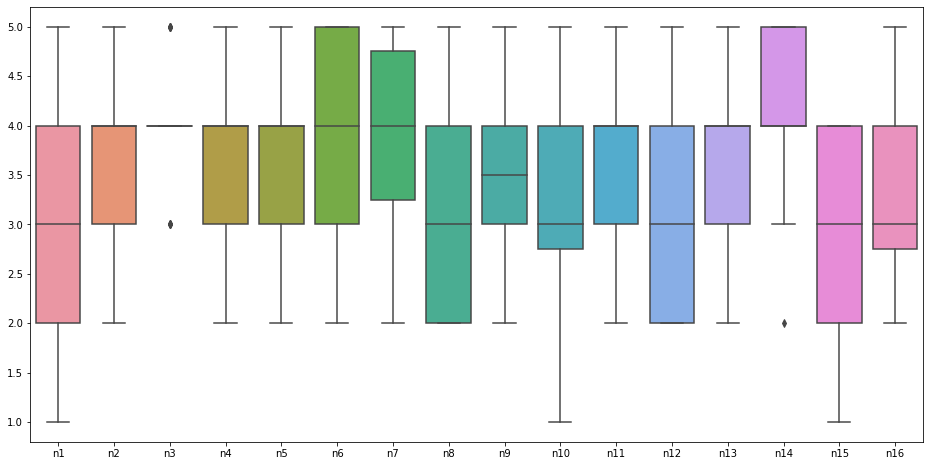

In [277]:
novel = df.filter(regex='n[0-9]+', axis=1)

sns.boxplot(data=novel)

<AxesSubplot:>

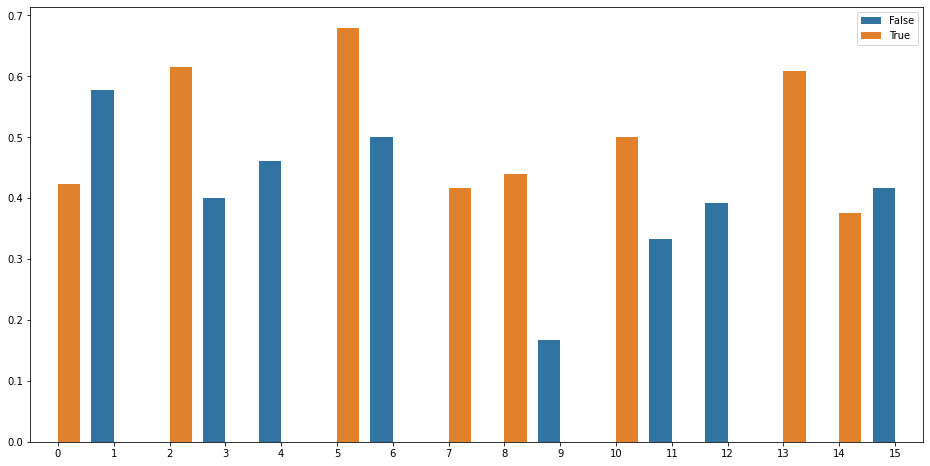

In [259]:
t = df.filter(regex='h[0-9]+', axis=1).mean().reset_index(drop=True)

sns.barplot(x=t.index, y=t.values, hue=labels.values)

<AxesSubplot:ylabel='Proportion'>

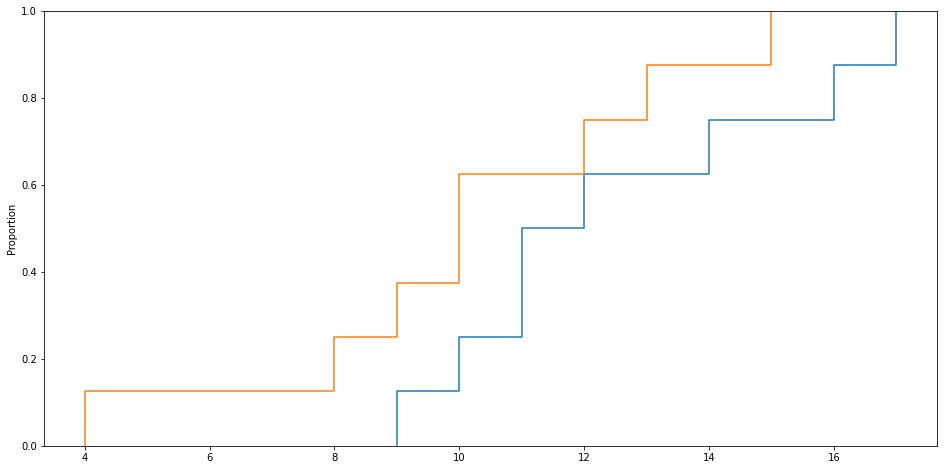

In [124]:
tur = df.filter(regex='h[0-9]*')
h = (tur.iloc[:, labels.values].sum(axis=0).sort_values()).reset_index(drop=True)
c = (tur.iloc[:, ~labels.values].sum(axis=0).sort_values()).reset_index(drop=True)
sns.ecdfplot(h)
sns.ecdfplot(c)

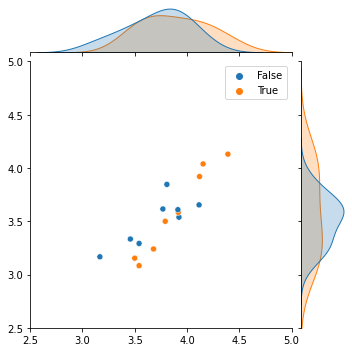

In [123]:
g = sns.jointplot(x=qscores, y=nscores,
                  hue=labels,
                  xlim=(2.5,5),
                  ylim=(2.5,5),
                  color="g", height=5)

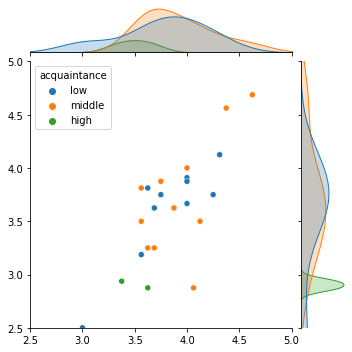

In [68]:
g = sns.jointplot(x=voting, y=nvoting,
                  hue=df['acquaintance'],
                  xlim=(2.5,5),
                  ylim=(2.5,5),
                  color="c", height=5)

In [95]:
q = pd.concat([
    pd.concat([qscores, pd.Series(index=range(1,17), data=np.repeat('q', 16)), labels],axis=1),
    pd.concat([nscores, pd.Series(index=range(1,17), data=np.repeat('n', 16)), labels],axis=1),
], axis=0).reset_index(drop=True)
q

,0,1,2
0,3.500000,q,True
1,3.923077,q,False
2,4.153846,q,True
3,4.115385,q,False
4,3.769231,q,False
5,4.120000,q,True
6,3.807692,q,False
7,3.680000,q,True
8,3.791667,q,True
9,3.541667,q,False


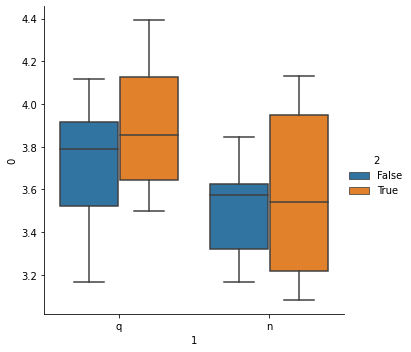

In [235]:
sns.catplot(data=q, x=1, y=0, hue=2, kind="box")

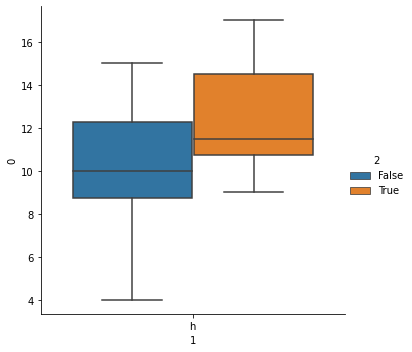

In [122]:
x = pd.concat([turing, pd.Series(index=range(1,17), data=np.repeat('h', 16)), labels],axis=1)
sns.catplot(data=x, x=1, y=0, hue=2, kind="box")

In [400]:
v = pd.concat([
    pd.concat([h_q_voting, pd.Series(index=range(26), data=[np.repeat('Q', 26), np.repeat('H', 26)]), df['acquaintance']],axis=1),
    pd.concat([c_q_voting, pd.Series(index=range(26), data=np.repeat('N', 26)), df['acquaintance']],axis=1),
    pd.concat([h_n_voting, pd.Series(index=range(26), data=np.repeat('Q', 26)), df['acquaintance']],axis=1),
    pd.concat([c_n_voting, pd.Series(index=range(26), data=np.repeat('N', 26)), df['acquaintance']],axis=1)
], axis=0).reset_index(drop=True)

ValueError: Length of values (2) does not match length of index (26)

In [398]:
v

,0,1,acquaintance
0,3.875,Q,low
1,4.750,Q,middle
2,3.625,Q,middle
3,3.750,Q,middle
4,4.125,Q,low
...,...,...,...
99,3.500,N,middle
100,3.500,N,middle
101,3.500,N,middle
102,4.000,N,low


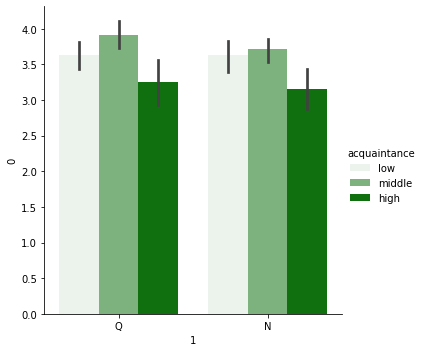

In [399]:
sns.catplot(data=v, x=1, y=0, hue='acquaintance', kind='bar', color='green')